<a href="https://colab.research.google.com/github/naseembabu/Speech-Classification/blob/main/emotions_classification_mfcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [ ]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding
from sklearn.model_selection import KFold
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPool1D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed, concatenate, add
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_fscore_support
from keras.models import Model
from keras import backend as K
#from keras.engine.topology import Layer, InputSpec
from tensorflow.keras.layers import Layer, InputSpec
from keras import initializers

In [ ]:
df1 = pd.read_json("/content/drive/MyDrive/Training_data.json")

In [ ]:
df2 = pd.read_json("/content/drive/MyDrive/Evaluation_data.json")

In [ ]:
df3 = pd.read_json("/content/drive/MyDrive/Development_data.json")

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [ ]:
df1['class'] = df1['class'].astype(str) 
df1['class'] = df1['class'].replace(str(2),"zero")
df1['class'] = df1['class'].replace(str(1),"one")
### Split the dataset into independent and dependent dataset
Y1 = df1['class']
Y1 = np.array(df1['class'].tolist())
X11 = np.array(df1['mfcc'].tolist())
#X12 = np.array(df1['cqcc'].tolist())
#X1 = np.concatenate((X11, X12), axis=1)
X_train = np.expand_dims(X11, 1)
### Label Encoding
y_train=np.array(pd.get_dummies(Y1))

In [ ]:
y_train.shape

(25380, 2)

In [ ]:
Y = df2['class']
df2['class'] = df2['class'].astype(str) 
df2['class'] = df2['class'].replace(str(2),"zero")
df2['class'] = df2['class'].replace(str(1),"one")
### Split the dataset into independent and dependent dataset
Y2 = np.array(df2['class'].tolist())
X21 = np.array(df2['mfcc'].tolist())
#X22 = np.array(df2['cqcc'].tolist())
#X2 = np.concatenate((X21, X22), axis=1)
X_eval = np.expand_dims(X22, 1)
### Label Encoding
y_eval=np.array(pd.get_dummies(Y2))

In [ ]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
71232    0
71233    1
71234    1
71235    0
71236    1
Name: class, Length: 71237, dtype: int64

In [ ]:
Y3 = df3['class']
df3['class'] = df3['class'].astype(str) 
df3['class'] = df3['class'].replace(str(2),"zero")
df3['class'] = df3['class'].replace(str(1),"one")

### Split the dataset into independent and dependent dataset
Y3 = np.array(df3['class'].tolist())
X31 = np.array(df3['mfcc'].tolist())
#X32 = np.array(df3['cqcc'].tolist())
#X3 = np.concatenate((X31, X32), axis=1)
X_dev = np.expand_dims(X31, 1)
### Label Encoding
y_dev=np.array(pd.get_dummies(Y3))

In [ ]:
y_dev

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [ ]:
### Train Test Split
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
input_train, input_test, target_train, target_test = train_test_split(X,y,test_size=0.3,random_state=0)

NameError: ignored

In [ ]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# # Merge inputs and targets
# inputs = np.concatenate((input_train, input_test), axis=0)
# targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X_train, y_train):
  model = Sequential()

# 2 LSTM layers
  audio_input = Input(shape=(1, 80, ))
  lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(audio_input)
  attn_layer = AttLayer(100)(lstm_layer)
  dense1 = Dense(64, activation='relu')(attn_layer)
#model.add(keras.layers.Dropout(0.3))
  output1 = Dense(2, activation='softmax')(dense1)
  model = Model(inputs = audio_input, outputs = output1)

  model

  # Compile the model
  model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(X_train, y_train, validation_data=(X_eval, y_eval), batch_size=32, epochs=50)

  # Generate generalization metrics
  scores = model.evaluate(X_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.28094926476478577 - Accuracy: 93.35453510284424%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.28137585520744324 - Accuracy: 93.14925074577332%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.26499807834625244 - Accuracy: 91.50700569152832%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.22577208280563354 - Accuracy: 91.80888533592224%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.3630423843860626 - Accuracy: 92.30800271034241%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.29368138313293457 - Accuracy: 91.90146327018738%
-------------------------------------------------------------------

In [ ]:

### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
class AttLayer(Layer):
    def __init__(self, attention_dim):
        self.init = initializers.get('normal')
        self.supports_masking = True
        self.attention_dim = attention_dim
        super(AttLayer, self).__init__()

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)))
        self.b = K.variable(self.init((self.attention_dim, )))
        self.u = K.variable(self.init((self.attention_dim, 1)))
        self._trainable_weights = [self.W, self.b, self.u]
        super(AttLayer, self).build(input_shape)

    def compute_mask(self, inputs, mask=None):
        return None

    def call(self, x, mask=None):
        # size of x :[batch_size, sel_len, attention_dim]
        # size of u :[batch_size, attention_dim]
        # uit = tanh(xW+b)
        uit = K.tanh(K.bias_add(K.dot(x, self.W), self.b))
        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)
        
        ait = K.exp(ait)

        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            ait *= K.cast(mask, K.floatx())
        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = x * ait
        output = K.sum(weighted_input, axis=1)

        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

In [ ]:
model = Sequential()

# 2 LSTM layers
audio_input = Input(shape=(1, 40, ))
lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(audio_input)
#lstm_layer2 = Bidirectional(LSTM(64))(lstm_layer)
attn_layer = AttLayer(100)(lstm_layer)
dense1 = Dense(64, activation='relu')(attn_layer)
drop1 = Dropout(0.3)(dense1)
output1 = Dense(2, activation='softmax')(drop1)
model = Model(inputs = audio_input, outputs = output1)

model

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1, 40)]           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 1, 128)            53760     
_________________________________________________________________
att_layer_4 (AttLayer)       (None, 128)               13000     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 130       
Total params: 75,146
Trainable params: 75,146
Non-trainable params: 0
_______________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:

history = model.fit(X_train, y_train, batch_size=64, epochs=50)

In [ ]:
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.metrics import roc_curve,auc

In [ ]:
y_score_eval = model.predict_on_batch(X_eval)
#y_score_eval = y_score_eval[:,1]
# y_eval = y_eval[:,1]
fpr_eval, tpr_eval, thresh_eval = roc_curve(y_eval[:,1], y_score_eval[:,1])
eer_eval = brentq(lambda x : 1. - x - interp1d(fpr_eval, tpr_eval)(x), 0., 1.)
thresh_eval = interp1d(fpr_eval, thresh_eval)(eer_eval)
fpr_eval, tpr_eval

(array([0.        , 0.23562203, 0.32522094, ..., 0.99986404, 1.        ,
        1.        ]),
 array([0.        , 0.41991484, 0.48519145, ..., 0.99978085, 0.99978085,
        1.        ]))

In [ ]:
eer_eval, thresh_eval

(0.42820471483460887, array(0.99999942))

In [ ]:
n_classes = 2
fpr_eval = dict()
tpr_eval = dict()
fnr_eval = dict()
roc_auc_eval = dict()
for i in range(n_classes):
    fpr_eval[i], tpr_eval[i], thresh_eval = roc_curve(y_eval[:, i], y_score_eval[:, i])
    fnr_eval[i] = 1-tpr_eval[i]
    roc_auc_eval[i] = auc(fpr_eval[i], tpr_eval[i])
# Compute ROC curve and ROC area for each class
fpr_final_eval=[]
tpr_final_eval=[]
roc_auc_final_eval=[]
fnr_final_eval=[]
  # Compute micro-average ROC curve and ROC area
fpr_eval["micro"], tpr_eval["micro"], _= roc_curve(y_eval.ravel(), y_score_eval.ravel())
roc_auc_eval["micro"] = auc(fpr_eval["micro"], tpr_eval["micro"])
fpr_final_eval.append(fpr_eval["micro"])
tpr_final_eval.append(tpr_eval["micro"])
roc_auc_final_eval.append(roc_auc_eval["micro"])

In [ ]:
names=['attention+mfcc']
models=[model]

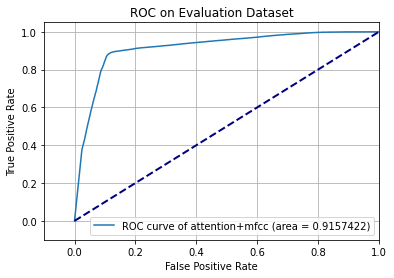

In [ ]:
#plt.figure(figsize=(10,8))
lw = 2
for i in range(len(models)):
  temp='ROC curve of '+names[i]+' (area = %0.7f)' % roc_auc_eval["micro"]
  plt.plot(fpr_final_eval[i], tpr_final_eval[i],
           label=temp)
  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Evaluation Dataset')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('/content/drive/MyDrive/Naseem IITP/mfcc1.png')

In [ ]:
y_score_dev = model.predict_on_batch(X_dev)
# y_score_dev = y_dev[:,1]
# y_dev = y_dev[:,1]
fpr_dev, tpr_dev, thresh_dev = roc_curve(y_dev[:,1], y_score_dev[:,1])
eer_dev = brentq(lambda x : 1. - x - interp1d(fpr_dev, tpr_dev)(x), 0., 1.)
thresh_dev = interp1d(fpr_dev, thresh_dev)(eer_dev)
fpr_dev, tpr_dev

(array([0.        , 0.00313972, 0.00470958, ..., 0.96546311, 0.96546311,
        1.        ]),
 array([0.        , 0.19608898, 0.23214926, ..., 0.99995515, 1.        ,
        1.        ]))

In [ ]:
eer_dev, thresh_dev

(0.20722135007953293, array(0.96244764))

In [ ]:
n_classes = 2
fpr = dict()
tpr = dict()
fnr = dict()
roc_auc = dict()
y_score_dev = model.predict_on_batch(X_dev)
for i in range(n_classes):
    fpr[i], tpr[i], thresh_dev = roc_curve(y_dev[:, i], y_score_dev[:, i])
    fnr[i] = 1-tpr[i]
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute ROC curve and ROC area for each class
fpr_final=[]
tpr_final=[]
roc_auc_final=[]
fnr_final=[]
  # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _= roc_curve(y_dev.ravel(), y_score_dev.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
fpr_final.append(fpr["micro"])
tpr_final.append(tpr["micro"])
roc_auc_final.append(roc_auc["micro"])

In [ ]:
thresh_eval

array([2.0000000e+00, 1.0000000e+00, 9.9999988e-01, ..., 1.1424191e-02,
       1.1280094e-02, 4.5121019e-04], dtype=float32)

In [ ]:
thresh_dev

array([2.0000000e+00, 1.0000000e+00, 9.9999988e-01, ..., 1.9584867e-04,
       1.9252632e-04, 9.1079855e-06], dtype=float32)

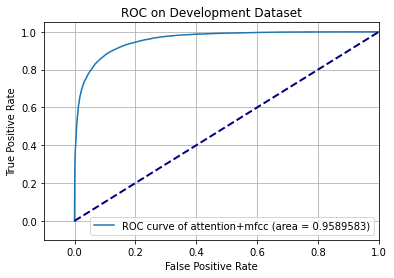

In [ ]:
#plt.figure(figsize=(10,8))
lw = 2
for i in range(len(models)):
  temp='ROC curve of '+names[i]+' (area = %0.7f)' % roc_auc["micro"]
  plt.plot(fpr_final[i], tpr_final[i],
           label=temp)
  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Development Dataset')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('/content/drive/MyDrive/Naseem IITP/mfcc2.png')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


history = model.fit(X_train, y_train, validation_data=(X_eval, y_eval), batch_size=32, epochs=100)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
794/794 [==============================] - 12s 10ms/step - loss: 0.2267 - accuracy: 0.9086 - val_loss: 0.2610 - val_accuracy: 0.8975
Epoch 2/100
794/794 [==============================] - 7s 9ms/step - loss: 0.1584 - accuracy: 0.9352 - val_loss: 0.2532 - val_accuracy: 0.8892
Epoch 3/100
794/794 [==============================] - 7s 9ms/step - loss: 0.1267 - accuracy: 0.9495 - val_loss: 0.2622 - val_accuracy: 0.8896
Epoch 4/100
794/794 [==============================] - 9s 11ms/step - loss: 0.1091 - accuracy: 0.9578 - val_loss: 0.3360 - val_accuracy: 0.8581
Epoch 5/100
794/794 [==============================] - 7s 9ms/step - loss: 0.0989 - accuracy: 0.9632 - val_loss: 0.2930 - val_accuracy: 0.8826
Epoch 6/100
794/794 [==============================] - 7s 9ms/step - loss: 0.0940 - accuracy: 0.9658 - val_loss: 0.3157 - val_accuracy: 0.8732
Epoch 7/100
794/794 [==============================] - 9s 11ms/step - loss: 0.0892 - accuracy: 0.9666 - val_loss: 0.3138 - val_accuracy: 0.

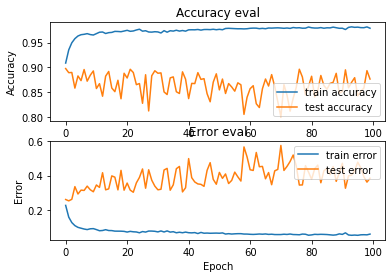

777/777 - 1s - loss: 0.2672 - accuracy: 0.9331

Test accuracy: 0.933102548122406


In [ ]:
# plot accuracy/error for training and validation
plot_history(history)

# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)